#  project 3: “HR Analytics"

    Tasks to perform:

    Data Cleaning:
    1. Deleting redundant columns.
    2. Renaming the columns.
    3. Dropping duplicates.
    4. Cleaning individual columns.
    5. Remove the NaN values from the dataset

    Check for some more Transformations
    Data Visualization:
    ∙        Plot a correlation map for all numeric variables
    ∙        Overtime
    ∙        Marital Status
    ∙        Job Role
    ∙        Gender
    ∙        Education Field
    ∙        Department
    ∙        Business Travel
    ∙        Relation between Overtime and Age
    ∙        Total Working Years
    ∙        Education Level
    ∙        Number of Companies Worked
    ∙        Distance from Home

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
pd.set_option('display.max_columns',None)

In [7]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [8]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
print(data.duplicated().value_counts())
data.drop_duplicates(inplace=True)
print(len(data))

False    1470
dtype: int64
1470


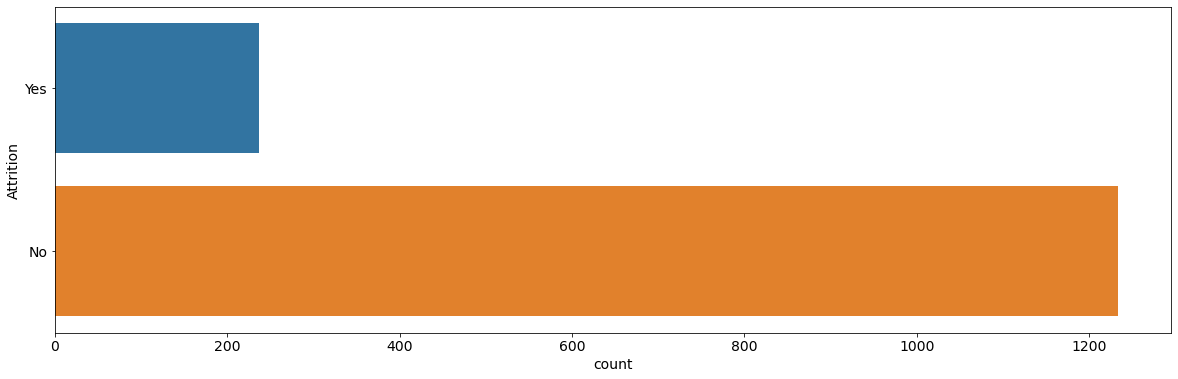

In [11]:
plt.figure(figsize=(20,6))
plt.rc("font",size=14)
sns.countplot(y = 'Attrition',data=data)
plt.show()

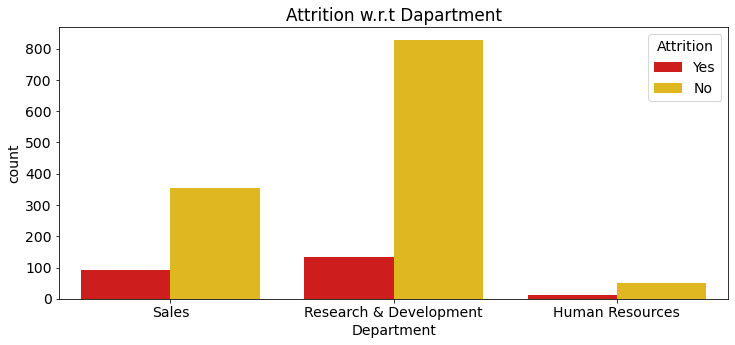

In [12]:
# Department wrt Attrition
plt.figure(figsize=(12,5))
sns.countplot(x='Department',hue='Attrition',data=data,palette='hot')
plt.title("Attrition w.r.t Dapartment")
plt.show()

Around 210 employees were removed, resigned, or experienced attrition,and the remaining out of 1470 employees, approximately 1190 are still working.


Over here we noticed that the target column is Highly Imbalanced , we need to balance the data by using some Statistical Method

A simplified example:

Imagine you have a dataset of 100 credit card transactions. Out of these:

- 95 transactions are legitimate (no fraud).
- 5 transactions are fraudulent.

Now, you want to train a machine learning model to detect fraud. You create a simple model and test it.

**Scenario 1: Imbalanced Learning**

If the model doesn't properly account for the imbalance and just predicts "No Fraud" for every transaction, it will be correct for 95 out of 100 transactions (95% accuracy). However, it will completely miss the 5 fraudulent cases.

**Scenario 2: Balanced Learning**

To address this, you use techniques to balance the learning. The model is now trained to consider both legitimate and fraudulent transactions. It learns patterns for both cases.

As a result, when you test it, the model correctly identifies most of the fraud cases (let's say 4 out of 5) while still correctly identifying legitimate transactions. Now, it's not just about accuracy; it's about finding the rare, but crucial, fraudulent cases.

So, in this example, balanced learning helps the model to perform better at identifying fraud, even though it's a rare event in the dataset

### Exploratory Data Analysis

Assume you have two classes, A and B, and you wish to know how many pupils in each class choose to drop out of school.


**In Class A:** Out of the 100 pupils, 40 chose to withdraw. To get the "Resignation Percentage" for Class A, use the following calculation: (40 resigning students out of 100 total) * 100% is 40%. Therefore, 40 percent of Class A pupils chose to withdraw.



**In Class B:** Out of the 1000 pupils, 40 chose to withdraw. You would compute (40 resignations / 1000 total students) * 100% = 4% to determine the "Resignation Percentage" for Class B. Thus, just 4 percent of the pupils in Class B chose to withdraw.



These days, you're considering the total number of students in each class in addition to the number of kids that dropped out. This clarifies why a higher number of students (40%) in Class A departed than in Class B (4%), which had a significantly lower percentage of students who left.

This perspective is known as a "Relative Approach." It makes it easier to recognise how big or small an occurrence is in relation to the group as a whole (the entire class), such as students departing.

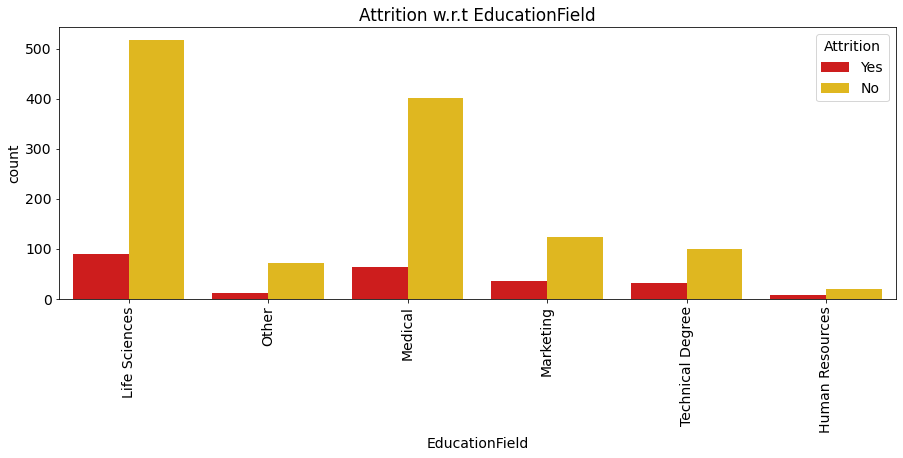

In [13]:
# Department wrt Attrition
plt.figure(figsize=(15,5))
sns.countplot(x='EducationField',hue='Attrition',data=data,palette='hot')
plt.title("Attrition w.r.t EducationField")
plt.xticks(rotation=90)
plt.show()

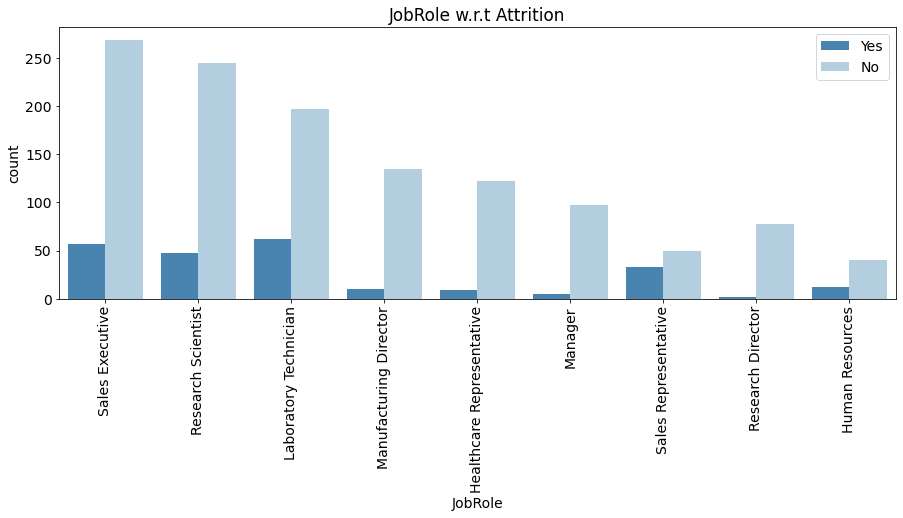

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(x='JobRole',hue='Attrition',data=data,palette='Blues_r')
plt.title("JobRole w.r.t Attrition")
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.show()

In [15]:
data['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [16]:
data['count']=1

In [17]:
data.groupby(["Gender","Attrition"]).agg({"count":"sum"})

count
Gender Attrition       
Female No           501
       Yes           87
Male   No           732
       Yes          150

In [18]:
87/(501+87)

0.14795918367346939

#### 14% attrition in female 

In [19]:
150/(732+150)

0.17006802721088435

### 17% attrition in male

In [20]:
# Droping the column which i have created for exter analytics part
data.drop(columns = ["count"],inplace =True)

### Notes

* There are more workers in the R&D department than in the sales department, but those in positions like sales executive or sales representative quit their jobs early.

* There is higher attrition among men than among women

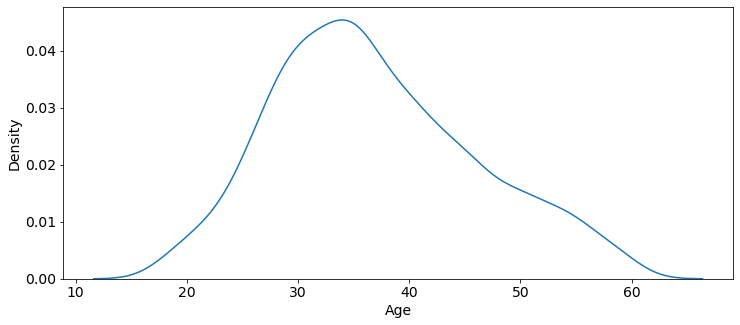

In [21]:
# Distribution of age
plt.figure(figsize=(12,5))
sns.distplot(data['Age'],hist=False)
plt.show()

In [22]:
# Remove leading and trailing whitespaces in column names and correct typos
ordinal_features = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating',
                     'RelationshipSatisfaction', 'WorkLifeBalance']

# Select the columns from the DataFrame
data[ordinal_features].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


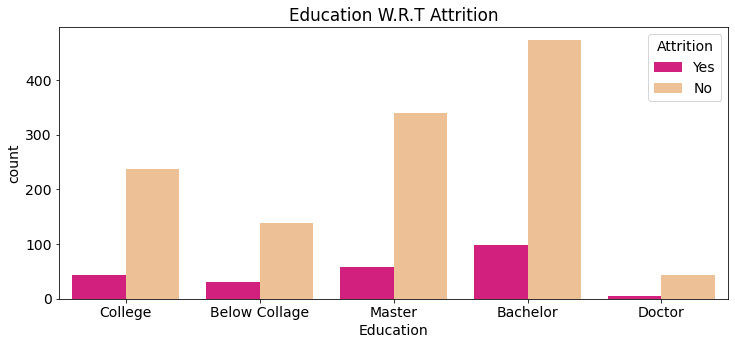

In [23]:
# This all factor are in Non-Numerical form
edu_map = {1:'Below Collage',2:'College',3:'Bachelor',4:'Master',5:'Doctor'}
plt.figure(figsize=(12,5))
sns.countplot(x=data['Education'].map(edu_map),hue='Attrition',data=data,palette='Accent_r')
plt.title("Education W.R.T Attrition")
plt.show()

In [24]:
# List of columns you want to get value counts for
columns_to_count = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

# Loop through each column and print its value counts
for column in columns_to_count:
    counts = data[column].value_counts()  # Get value counts for the current column
    print(f"Value counts for {column}:\n{counts}\n")  # Print the value counts with a title and some space


Value counts for BusinessTravel:
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Value counts for Department:
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Value counts for EducationField:
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Value counts for JobRole:
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Value counts for MaritalStatus:
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64



In [25]:
# Traget Varaiable (Attrition)
data['Attrition'] = data['Attrition'].replace({'No':0,'Yes':1})

In [26]:
# Encode Binary Variable
data['OverTime']=data['OverTime'].map({'No':0,'Yes':1})
# Map 'Male' to 0 and 'Female' to 1
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [27]:
# Encode Categorical Column which are ordinal , use labelEncding
# apple Label Encoder to df_categorical

from sklearn.preprocessing import LabelEncoder

encoding_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']  # Corrected column name

label_encoders = {}
for column in encoding_cols:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [28]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,1,94,3,2,7,4,2,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,0,61,2,2,6,2,1,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,0,92,2,1,2,3,2,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,1,56,3,1,6,3,1,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,0,40,3,1,2,2,1,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2


In [29]:
data['Over18']=data['Over18'].map({'Y':1,'No':0})

In [30]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,1,94,3,2,7,4,2,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,0,61,2,2,6,2,1,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,0,92,2,1,2,3,2,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,1,56,3,1,6,3,1,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,0,40,3,1,2,2,1,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

# ML modelling

In [32]:
X = data.drop(['Attrition','Over18'],axis=1)   
y = data['Attrition'].values    

In [33]:
pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [34]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# Assuming you have defined X and y
print(Counter(y))

# Create an instance of RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the data to balance the classes
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the class distribution after resampling
print(Counter(y_resampled))


Counter({0: 1233, 1: 237})
Counter({1: 1233, 0: 1233})


In [37]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Assuming you have your original data in X and y

# Create an instance of RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply oversampling to your data
X_over, y_over = ros.fit_resample(X, y)

# Split the oversampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)


In [38]:
# split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_over,y_over,test_size=0.2,random_state=42)

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1972, 33)
(1972,)
(494, 33)
(494,)


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [41]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [42]:
prediction = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test,prediction)
print("Accuracy Score : ",accuracy_score(y_test,prediction))

Accuracy Score :  0.6417004048582996


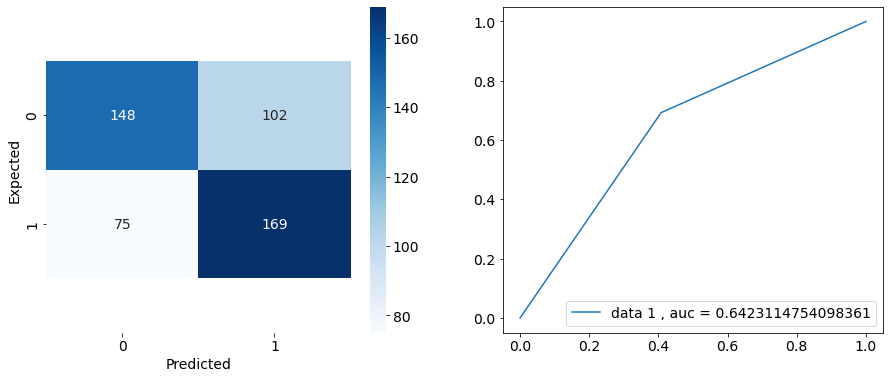

In [43]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.heatmap(pd.DataFrame(cnf_matrix),annot = True , cmap = 'Blues',fmt='d')
bottom,top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5,top - 0.5)
plt.xlabel('Predicted')
plt.ylabel('Expected')


ax2 = fig.add_subplot(1,2,2)
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr,tpr , _ = roc_curve(y_test,prediction)
auc = roc_auc_score(y_test,prediction)
ax2 = plt.plot(fpr,tpr,label = "data 1 , auc = "+str(auc))
plt.legend(loc=4)
plt.show()

1. Possible options -
         Yes, No

2. Possible predictions
         Yes No

**4 total prediction possibilities**


* Actual , Predicted = Result

* Yes    , Yes       = Right prediction True Positive

* Yes    , No        = Wrong prediction False Negative  

* No     , Yes       = Wrong prediction False Positive

* No     , No        = Right prediction - True Negative